## Import packages

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
sou_rec_pos = pd.read_pickle("sou_rec_pos.pkl")
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1182365,1105911,1181982,1106233,1121,1137,0,133195.117308,1613410.040671,133695.147082,1613428.566994
1,1,1182365,1105911,1182018,1106201,1099,1137,0,133243.281522,1613410.497256,133695.147082,1613428.566994
2,1,1182365,1105911,1182053,1106169,1090,1137,0,133290.704658,1613410.282421,133695.147082,1613428.566994
3,1,1182365,1105911,1182089,1106137,1082,1137,0,133338.868872,1613410.739005,133695.147082,1613428.566994
4,1,1182365,1105911,1182124,1106105,1073,1137,0,133386.292008,1613410.524171,133695.147082,1613428.566994
...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056,323,319,0,147364.797755,1626008.972571,147626.850767,1625996.757056
3566874,3645,1201128,1105871,1200978,1106024,321,319,0,147412.961969,1626009.429156,147626.850767,1625996.757056
3566875,3645,1201128,1105871,1201013,1105992,321,319,0,147460.385105,1626009.214321,147626.850767,1625996.757056
3566876,3645,1201128,1105871,1201049,1105959,320,319,0,147509.220738,1626008.929828,147626.850767,1625996.757056


## Topography map

In [3]:
rec_pos_ele=sou_rec_pos.drop_duplicates(subset=['ReceiverX','ReceiverY'])
sou_pos_ele=sou_rec_pos.drop_duplicates(subset=['SourceX_new','SourceY_new'])
x=np.concatenate((rec_pos_ele['ReceiverX'].to_numpy().astype('f'), 
                  sou_pos_ele['SourceX_new'].to_numpy().astype('f')),axis=0)
y=np.concatenate((rec_pos_ele['ReceiverY'].to_numpy().astype('f'), 
                  sou_pos_ele['SourceY_new'].to_numpy().astype('f')),axis=0)
z=np.concatenate((rec_pos_ele['ReceiverGroupElevation'].to_numpy().astype('f'), 
                  sou_pos_ele['SourceSurfaceElevation'].to_numpy().astype('f')),axis=0)

In [4]:
from scipy.interpolate import Rbf
xmin=rec_pos_ele['ReceiverX'].min()
xmax=rec_pos_ele['ReceiverX'].max()
ymin=rec_pos_ele['ReceiverY'].min()
ymax=rec_pos_ele['ReceiverY'].max()
tx = np.linspace(xmin, xmax, 100)
ty = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(tx, ty)
rbf = Rbf(x, y, z, function='linear')
ZI = rbf(XI, YI)

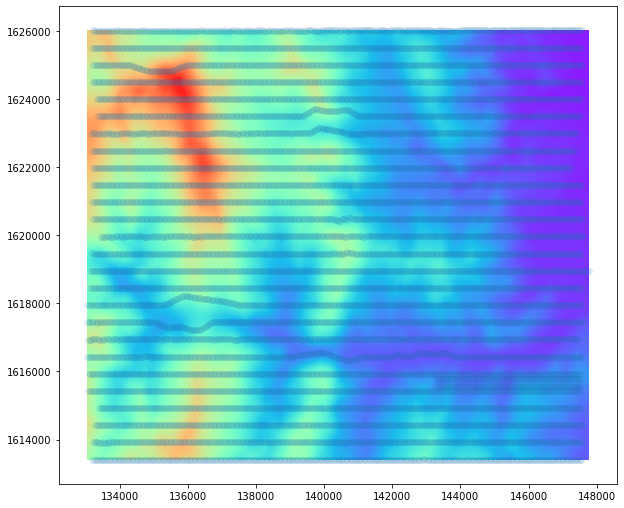

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.rainbow, alpha=.9, 
           interpolation='bilinear', origin='lower',
           extent=(xmin, xmax, ymin, ymax))
plt.scatter(rec_pos_ele['ReceiverX'],rec_pos_ele['ReceiverY'], alpha=0.1)
plt.show()

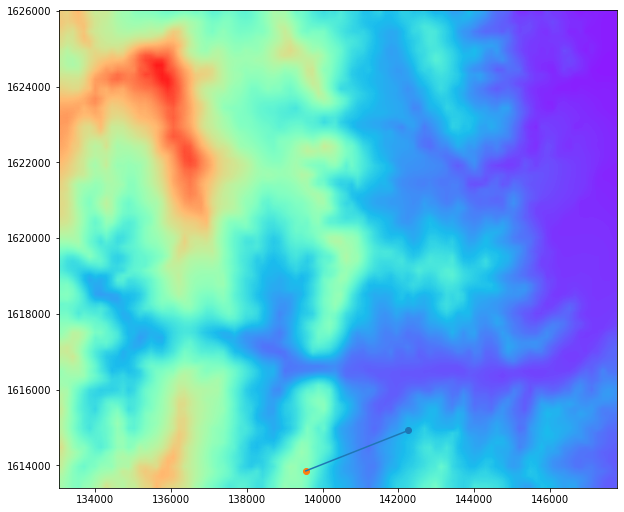

In [6]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(ZI, cmap=plt.cm.rainbow, alpha=.9, 
           interpolation='bilinear', origin='lower',
           extent=(xmin, xmax, ymin, ymax))
plt.scatter(rec_pos_ele['ReceiverX'].iloc[5000],rec_pos_ele['ReceiverY'].iloc[5000], alpha=1)
plt.scatter(rec_pos_ele['SourceX_new'].iloc[5000],rec_pos_ele['SourceY_new'].iloc[5000], alpha=1)
x_pts=np.array([rec_pos_ele['SourceX_new'].iloc[5000],rec_pos_ele['ReceiverX'].iloc[5000]])
y_pts=np.array([rec_pos_ele['SourceY_new'].iloc[5000],rec_pos_ele['ReceiverY'].iloc[5000]])
plt.plot(x_pts,y_pts)
plt.show()

In [7]:
z_pts=np.array([rec_pos_ele['SourceSurfaceElevation'].iloc[5000],rec_pos_ele['ReceiverGroupElevation'].iloc[5000]])
xt = np.linspace(rec_pos_ele['SourceX_new'].iloc[5000],rec_pos_ele['ReceiverX'].iloc[5000], 100)
from scipy.interpolate import interp1d
f = interp1d(x_pts, y_pts, kind='linear')
yt = f (xt)
zt = rbf(xt, yt)

In [8]:
offset = np.linalg.norm([np.diff(x_pts),np.diff(y_pts),np.diff(z_pts)], axis=0) 
geodesic = np.sum(np.linalg.norm([np.diff(xt),np.diff(yt),np.diff(zt)], axis=0))

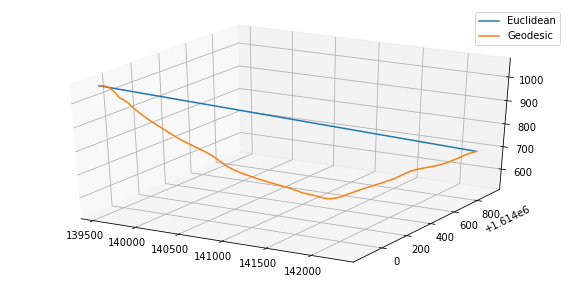

In [9]:
plt.rcParams['figure.figsize'] = [10, 5]
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_pts,y_pts,z_pts,label='Euclidean')
ax.plot(xt,yt,zt,label='Geodesic')
plt.legend()
plt.show()

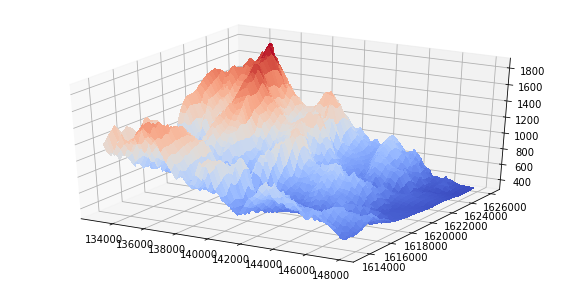

In [10]:
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XI, YI, ZI, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [12]:
#import pickle
#with open('inter_topo.pkl', 'wb') as f:
#    pickle.dump(rbf, f)